In [1]:
from connattractor import analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
connfile = '../data_in/connectome_partial_correlation.csv'

mtx = pd.read_csv(connfile)
mtx = mtx.drop("Unnamed: 0", axis='columns')
mtx = mtx.drop("GlobSig", axis="columns")
mtx = mtx.drop(0, axis="index")


simresults = analysis.simulate_activations(mtx.values, noise_coef=0.7, num_iter=10000, beta=0.06)
# set noise_coef so that the PC-plot is symmetric to the center, but still nicely separates attractors

100%|██████████| 10000/10000 [00:04<00:00, 2226.28it/s]


In [2]:
simresults.save('../data_in/ex_simulation.pckl')

NameError: name 'simresults' is not defined

In [2]:
simresults = analysis.load_simulation('../data_in/ex_simulation.pckl')

In [5]:
hopfield_embedding = analysis.create_embeddings(simresults, attractor_sample=1000)
hopfield_embedding.save('../data_in/ex_embedding.pckl')

100%|██████████| 1000/1000 [00:52<00:00, 18.89it/s]


In [3]:
hopfield_embedding = analysis.load_embedding('../data_in/ex_embedding.pckl')

<PolarAxes: >

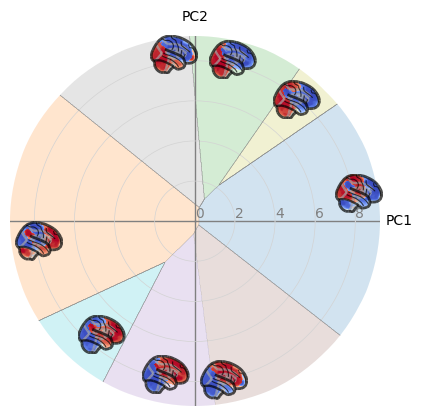

In [4]:
# empty plot
hopfield_embedding.plot()

<PolarAxes: >

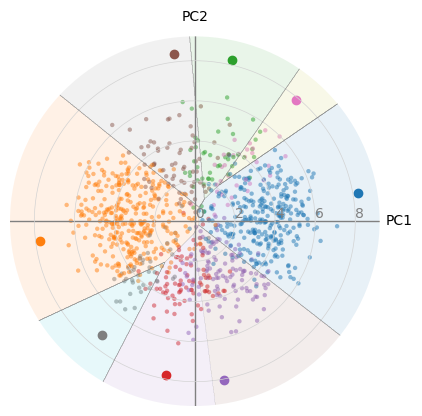

In [5]:
# let's plot the simulated states
import matplotlib.pyplot as plt
colors = np.array(plt.rcParams['axes.prop_cycle'].by_key()['color'])
hopfield_embedding.plot(hopfield_embedding.state_sample, 
                        c=colors[hopfield_embedding.attractor_sample.astype(int)], 
                        alpha=0.5, regimes_fill_kwargs=dict(alpha=0.1),
                        attractor_plot_type='scatter')


Text(0.5, 1.0, 'Hopfield embedding of simulated data')

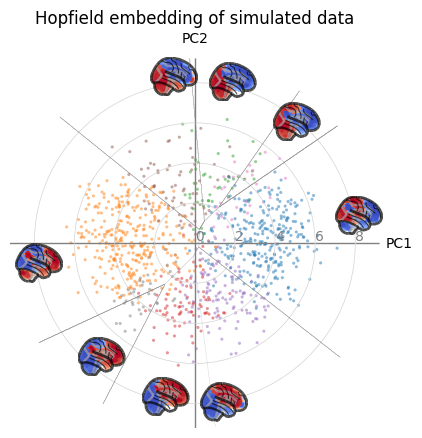

In [6]:
# let's plot the simulated states
import matplotlib.pyplot as plt
colors = np.array(plt.rcParams['axes.prop_cycle'].by_key()['color'])
hopfield_embedding.plot(hopfield_embedding.state_sample, s=5,
                        c=colors[hopfield_embedding.attractor_sample.astype(int)], 
                        alpha=0.5, regimes_fill_kwargs=dict(alpha=0),
                        attractor_plot_type='glassbrain').set_title("Hopfield embedding of simulated data")


<PolarAxes: >

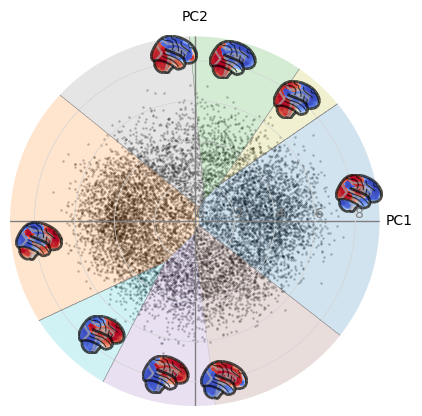

In [7]:
hopfield_embedding.plot(simresults.states, plot_type='scatter', alpha=0.3, s=3)

/home/tspisak/src/connattractor/connattractor/analysis.py:148: UserWarning: linewidths is ignored by contourf
  ax.contourf(theta, rad, H, **default_activation_contour_kwargs)


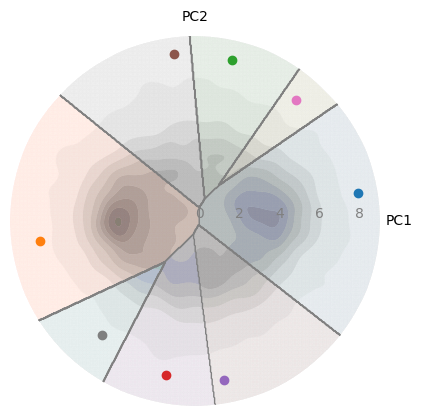

In [20]:
hopfield_embedding.plot(simresults.states, plot_type='contour',
                        density_bins=1000, density_sigma=20, attractor_plot_type='scatter',
                        regimes_fill_kwargs=dict(alpha=0.01, cmap='tab10', shading='gouraud'),
                        regimes_contour_kwargs=dict(linewidths=1, colors='gray', alpha=1, antialiased=True),
                        activation_kwargs=dict(cmap='gray_r', alpha=0),
                        activation_contour_kwargs=dict(levels=8, alpha=0.5, cmap='gray_r',antialiased=True)
                       ).grid(False)



In [10]:
connfile = '../data_in/connectome_partial_correlation.csv'
mtx = pd.read_csv(connfile)
mtx = mtx.drop("Unnamed: 0", axis='columns')
mtx = mtx.drop("GlobSig", axis="columns")
mtx = mtx.drop(0, axis="index")

In [11]:
beta = 0.04
npoise_coef = 0.4
simresults = analysis.simulate_activations(mtx.values, noise_coef=0.6, num_iter=100000, beta=beta)
hopfield_embedding = analysis.create_embeddings(simresults)
colors = np.array(plt.rcParams['axes.prop_cycle'].by_key()['color'])
hopfield_embedding.plot(simresults.states, s=2, 
                    c='black', 
                    alpha=0.1, regimes_fill_kwargs=dict(alpha=0.2),
                    attractor_plot_type='glassbrain').set_title("Beta = " + str(beta))

  2%|▏         | 15/1000 [00:01<01:22, 11.92it/s]


KeyboardInterrupt: 

In [ ]:
beta = 0.05
npoise_coef = 0.5
simresults = analysis.simulate_activations(mtx.values, noise_coef=0.6, num_iter=100000, beta=beta)
hopfield_embedding = analysis.create_embeddings(simresults)
colors = np.array(plt.rcParams['axes.prop_cycle'].by_key()['color'])
hopfield_embedding.plot(simresults.states, s=2, 
                    c='black', 
                    alpha=0.1, regimes_fill_kwargs=dict(alpha=0.2),
                    attractor_plot_type='glassbrain').set_title("Beta = " + str(beta))

In [ ]:
connfile = '../data_in/connectome_partial_correlation.csv'

mtx = pd.read_csv(connfile)
mtx = mtx.drop("Unnamed: 0", axis='columns')
mtx = mtx.drop("GlobSig", axis="columns")
mtx = mtx.drop(0, axis="index")

#                             4           6             8              10
for beta, noise_coef in [(0.065, 1), (0.1, 1.5)]:
    simresults = analysis.simulate_activations(mtx.values, noise_coef=noise_coef, num_iter=10000, beta=beta)
    hopfiled_embedding = analysis.create_embeddings(simresults)
    colors = np.array(plt.rcParams['axes.prop_cycle'].by_key()['color'])
    hopfiled_embedding.plot(simresults.states, s=2, 
                        c=colors[simresults.attractors.astype(int)], 
                        alpha=0.5, regimes_fill_kwargs=dict(alpha=0),
                        attractor_plot_type='glassbrain').set_title("Beta = " + str(beta))

    plt.show()

In [ ]:
connfile = '../data_in/connectome_partial_correlation.csv'

mtx = pd.read_csv(connfile)
mtx = mtx.drop("Unnamed: 0", axis='columns')
mtx = mtx.drop("GlobSig", axis="columns")
mtx = mtx.drop(0, axis="index")

#                             4           6             8              10
for beta, noise_coef in [(0.07, 1.5)]:
    simresults = analysis.simulate_activations(mtx.values, noise_coef=noise_coef, num_iter=10000, beta=beta)
    hopfiled_embedding = analysis.create_embeddings(simresults)
    colors = np.array(plt.rcParams['axes.prop_cycle'].by_key()['color']*10)
    hopfiled_embedding.plot(simresults.states, s=2, 
                        c=colors[simresults.attractors.astype(int)], 
                        alpha=0.5, regimes_fill_kwargs=dict(alpha=0),
                        attractor_plot_type='glassbrain').set_title("Beta = " + str(beta))

    plt.show()

In [ ]:
connfile = '../data_in/connectome_partial_correlation.csv'

mtx = pd.read_csv(connfile)
mtx = mtx.drop("Unnamed: 0", axis='columns')
mtx = mtx.drop("GlobSig", axis="columns")
mtx = mtx.drop(0, axis="index")

#                             4           6             8              10
for beta, noise_coef in [(0.075, 1.5)]:
    #simresults = analysis.simulate_activations(mtx.values, noise_coef=noise_coef, num_iter=10000, beta=beta)
    #hopfiled_embedding = analysis.create_embeddings(simresults)
    colors = np.array(plt.rcParams['axes.prop_cycle'].by_key()['color']*10)
    hopfiled_embedding.plot(simresults.states, s=2, 
                        #c=colors[simresults.attractors.astype(int)], 
                        c=simresults.energies,
                        alpha=0.5, regimes_fill_kwargs=dict(alpha=0),
                        attractor_plot_type='glassbrain').set_title("Beta = " + str(beta))

    plt.show()

In [ ]:
connfile = '../data_in/connectome_partial_correlation.csv'

mtx = pd.read_csv(connfile)
mtx = mtx.drop("Unnamed: 0", axis='columns')
mtx = mtx.drop("GlobSig", axis="columns")
mtx = mtx.drop(0, axis="index")

#                             4           6             8              10
for beta, noise_coef in [(0.075, 0.7)]:
    simresults = analysis.simulate_activations(mtx.values, noise_coef=noise_coef, num_iter=100000, beta=beta,
                                               calculate_attractors=False)
    #hopfiled_embedding = analysis.create_embeddings(simresults)
    colors = np.array(plt.rcParams['axes.prop_cycle'].by_key()['color']*10)
    hopfiled_embedding.plot(simresults.states, s=2, 
                        #c=colors[simresults.attractors.astype(int)], 
                        c=simresults.energies,
                        alpha=0.5, regimes_fill_kwargs=dict(alpha=0),
                        attractor_plot_type='glassbrain').set_title("Beta = " + str(beta))

    plt.show()

In [ ]:
connfile = '../data_in/connectome_partial_correlation.csv'

mtx = pd.read_csv(connfile)
mtx = mtx.drop("Unnamed: 0", axis='columns')
mtx = mtx.drop("GlobSig", axis="columns")
mtx = mtx.drop(0, axis="index")

#                             4           6             8              10
for beta, noise_coef in [(0.077, 1.5)]:
    simresults = analysis.simulate_activations(mtx.values, noise_coef=noise_coef, num_iter=10000, beta=beta,
                                               calculate_attractors=True)
    hopfiled_embedding = analysis.create_embeddings(simresults)
    colors = np.array(plt.rcParams['axes.prop_cycle'].by_key()['color']*10)
    hopfiled_embedding.plot(simresults.states, s=2, 
                        #c=colors[simresults.attractors.astype(int)], 
                        c=simresults.energies,
                        alpha=0.5, regimes_fill_kwargs=dict(alpha=0),
                        attractor_plot_type='glassbrain').set_title("Beta = " + str(beta))

    plt.show()

In [ ]:
    colors = np.array(plt.rcParams['axes.prop_cycle'].by_key()['color']*10)
    hopfiled_embedding.plot(simresults.states, s=2, 
                        c=colors[simresults.attractors.astype(int)], 
                        alpha=0.5, regimes_fill_kwargs=dict(alpha=0.2),
                        attractor_plot_type='glassbrain').set_title("Beta = " + str(beta))

    plt.show()

In [ ]:
# motor,
#sensory visual, pain, hearing
#language
# working memory
# social
# relational
# emotion: fear, anger, happyness, etc

# todo:
- map states with low noise and high n, but without attractor calculation
- do the attractor calulcation for a random sample during embedding calculation
- make the attractor model based on that
- plot regimes non linearly (with heatmap?) rectangular grid, bigger than view, then set limits


In [15]:
max_r=10
x, y = np.meshgrid(np.linspace(-max_r * 1.2, max_r * 1.2, 10),
                                   np.linspace(-max_r * 1.2, max_r * 1.2, 10)) 
x.shape

(10, 10)